In [33]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
import sys
import matplotlib.pyplot as plt
from matplotlib import *
df=pd.read_csv('df_policies_3.csv') 
df.head()
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.columns.values
#df.dtypes
#Processing the data
# NA summary
df.shape
#检查缺失数据
#df.isnull().sum().sort_values(ascending=False)
df.head()

# Get rid of NA and empty with mean
df.credit_score =  df.credit_score.fillna(df.credit_score.mean())
df.quoted_amt =  df.quoted_amt.fillna(df.credit_score.mean())
#df.CAT_zone =  df.CAT_zone.fillna(df.credit_score.mean())
#df.Cov_package_type =  df.Cov_package_type.fillna(df.credit_score.mean())
df.avg_age_veh =  df.avg_age_veh.fillna(df.credit_score.mean())

df = df.dropna(axis=0)
# Create dummy variable 
#df['state_id'] = df['state_id'].astype('category').cat.codes
#df['Prior_carrier_grp'] = df['Prior_carrier_grp'].astype('category').cat.codes
#df['Cov_package_type'] = df['Cov_package_type'].astype('category').cat.codes
#df['living_status'] = df['living_status'].astype('category').cat.codes
df= df.join(pd.get_dummies(df['state_id']))
df= df.join(pd.get_dummies(df['Prior_carrier_grp']))
df= df.join(pd.get_dummies(df['Cov_package_type']))
df= df.join(pd.get_dummies(df['living_status']))
df= df.join(pd.get_dummies(df['CAT_zone']))
df.quoted_amt = df['quoted_amt'].replace('\$', '', regex=True).replace(',','', regex = True)

df.discount = pd.Series(np.where(df.discount.values == 'Yes', 1, 0),df.index)
df.Home_policy_ind = pd.Series(np.where(df.Home_policy_ind.values == 'Y', 1, 0),df.index)
df.columns.values

array(['Unnamed: 0', 'X', 'Year', 'Month', 'day', 'discount',
       'Home_policy_ind', 'zip', 'state_id', 'county_name', 'Agent_cd',
       'quoted_amt', 'Prior_carrier_grp', 'credit_score',
       'Cov_package_type', 'CAT_zone', 'policy_id', 'number_drivers',
       'num_loaned_veh', 'num_owned_veh', 'num_leased_veh',
       'total_number_veh', 'convert_ind', 'split', 'primary_parking',
       'season', 'avg_age_veh', 'avg_age_dv', 'living_status',
       'high_education_ind', 'num_luxury_motor', 'luxury_motor', 'AL',
       'CT', 'FL', 'GA', 'MN', 'NJ', 'NY', 'WI', 'Carrier_1', 'Carrier_2',
       'Carrier_3', 'Carrier_4', 'Carrier_5', 'Carrier_6', 'Carrier_7',
       'Carrier_8', 'Other', 'High', 'Low', 'Medium', 'other', 'own',
       'rent', 1.0, 2.0, 3.0, 4.0, 5.0], dtype=object)

In [3]:
# Get training data
df_train = df[df.split == 'Train']
df_test = df[df.split == 'Test']
df_train.head()
df_train['convert_ind'].value_counts()

0.0    25245
1.0     3221
Name: convert_ind, dtype: int64

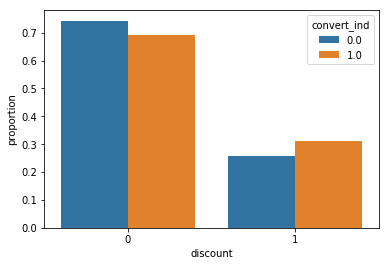

In [3]:
%matplotlib inline 
#pd.crosstab(df.discount,df.convert_ind).plot(kind='bar') 
#plt.title('Purchase Frequency for discount')
#plt.xlabel('Discount') 
#plt.ylabel('Frequency of Purchase')

import seaborn as sns

x, y, hue = "discount", "proportion", "convert_ind"
hue_order = ["0.0", "1.0"]
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))




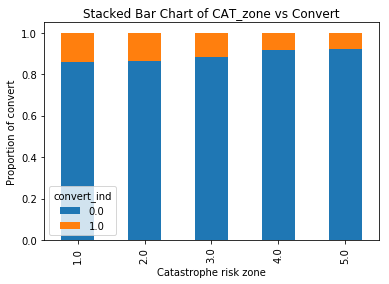

In [4]:
table=pd.crosstab(df_train.CAT_zone, df_train.convert_ind)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.title('Stacked Bar Chart of CAT_zone vs Convert') 
plt.xlabel('Catastrophe risk zone') 
plt.ylabel('Proportion of convert')
plt.savefig('Catastrophe risk zone_bar_chart')

In [5]:
#vert some categorical data to dummies
#df['state_id'] = df['state_id'].astype('category').cat.codes
#df['season'] = df['season'].astype('category').cat.codes
#df['living_status'] = df['living_status'].astype('category').cat.codes
#df = pd.get_dummies(df)

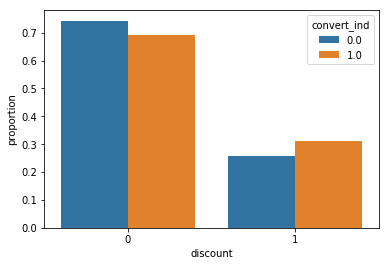

In [6]:
%matplotlib inline 
#pd.crosstab(df.discount,df.convert_ind).plot(kind='bar') 
#plt.title('Purchase Frequency for discount')
#plt.xlabel('Discount') 
#plt.ylabel('Frequency of Purchase')

import seaborn as sns

x, y, hue = "discount", "proportion", "convert_ind"
hue_order = ["0.0", "1.0"]
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))




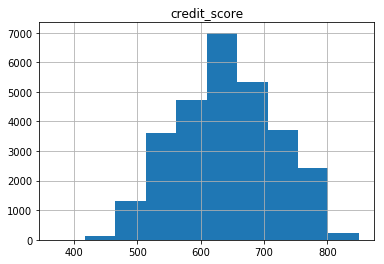

In [7]:
# matplotlib histogram
#plt.hist(df_train['credit_score'], color = 'steelblue', edgecolor = 'black''quoted_amt',
       #  bins = int(180/5))
  
#df_subset=df_train[['credit_score', 'quoted_amt']]
#num_bins=2
#df_train[['credit_score']].hist(bin=num_bins,figsize=(20,15))
#plt.savefig("df_subset_hisgram_plots")
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

#df_subset_1 = df_train['credit_score']
df_train.hist(column='credit_score')
plt.show()

#df_train.head()

In [8]:
#df_train.hist(column='quoted_amt')
#plt.show()
#df_train['quoted_amt'].hist()
#df_train.quoted_amt.dtypes
#plt.show()
#pd.show_versions()

In [5]:
Y_column = ['convert_ind']
#X_column = ['Year','Month','discount', 'Home_policy_ind', 'zip', 'Agent_cd','quoted_amt', 'credit_score',
     # 'Cov_package_type', 'CAT_zone', 'number_drivers','num_loaned_veh', 'num_owned_veh', 'num_leased_veh',
    # 'total_number_veh',  'season', 'avg_age_veh', 'avg_age_dv', 'high_education_ind', 'num_luxury_motor', 'luxury_motor', 'AL',
    #  'CT', 'FL', 'GA', 'MN', 'NJ', 'NY', 'WI', 'Carrier_1', 'Carrier_2','Carrier_3', 'Carrier_4', 'Carrier_5', 'Carrier_6', 'Carrier_7',
    # 'Carrier_8', 'Other',  'High', 'Low', 'Medium', 'other', 'own', 'rent']
X_column = ['Year','Month','zip','discount', 'quoted_amt', 'credit_score','CAT_zone', 
            'number_drivers','num_loaned_veh', 'num_owned_veh', 'num_leased_veh',
            'total_number_veh',  'season', 'avg_age_veh', 'avg_age_dv', 'high_education_ind',
           'num_luxury_motor', 'luxury_motor', 'AL', 'CT', 'FL', 'GA', 'MN', 'NJ', 'NY', 'WI', 
            'Carrier_1', 'Carrier_2','Carrier_3', 'Carrier_4', 'Carrier_5', 'Carrier_6', 'Carrier_7',
            'Carrier_8', 'Other',  'High', 'Low', 'Medium', 'other', 'own', 'rent'
           ]

In [6]:
#Feature Selection
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

rfe = RFE(model, 30) 
rfe = rfe.fit(df_train[X_column], df_train[Y_column]) 
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True False  True False False  True  True False  True False False
  True False False  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True]
[ 8  1 12  1 11  7  1  1  6  1  3  4  1 10  5  1  1  1  1  1  1  1  2  1
  1  1  1  1  1  1  1  1  1  1  9  1  1  1  1  1  1]


In [7]:

Y_train = df_train[Y_column]
X_train = df_train[X_column]
X_test_submit = df_test[X_column]
Y_test_submit = df_test[Y_column]

logreg = LogisticRegression(penalty = 'l1', C = 0.1) # l1 is Lasso. l2 is Ridge regression

# Logistic Regression Model
X_train_cv, X_test_cv, Y_train_cv, Y_test_cv = train_test_split(X_train,Y_train, test_size=0.3, random_state= 0)
logreg = logreg.fit(X_train_cv,Y_train_cv)
print('logistic Accuracy:{:.3f}'.format(accuracy_score(Y_test_cv,logreg.predict(X_test_cv))))
#display('logistic Accuracy:{:.3f}'.format(accuracy_score(Y_test_cv,clf.predict(X_test_cv))))

# Final predict
#clf_submit = logreg.fit(X_train,Y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


logistic Accuracy:0.885


In [30]:
list(X_train) 

['Year',
 'Month',
 'zip',
 'discount',
 'quoted_amt',
 'credit_score',
 'CAT_zone',
 'number_drivers',
 'num_loaned_veh',
 'num_owned_veh',
 'num_leased_veh',
 'total_number_veh',
 'season',
 'avg_age_veh',
 'avg_age_dv',
 'high_education_ind',
 'num_luxury_motor',
 'luxury_motor',
 'AL',
 'CT',
 'FL',
 'GA',
 'MN',
 'NJ',
 'NY',
 'WI',
 'Carrier_1',
 'Carrier_2',
 'Carrier_3',
 'Carrier_4',
 'Carrier_5',
 'Carrier_6',
 'Carrier_7',
 'Carrier_8',
 'Other',
 'High',
 'Low',
 'Medium',
 'other',
 'own',
 'rent']

In [29]:
logreg.coef_

array([[-9.57405766e-04,  4.75668428e-03, -3.05361760e-06,
         1.56674912e-01, -4.28686050e-05,  1.06826741e-03,
        -1.16126023e-01, -2.44503077e-01,  8.87672511e-03,
         1.77888589e-02, -1.96157757e-02,  1.30966293e-03,
        -6.33585783e-03,  1.82634611e-04, -4.67038559e-03,
         3.10669854e-01,  5.21180401e-02,  0.00000000e+00,
         0.00000000e+00, -1.20393706e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.71957750e-01,  0.00000000e+00,  0.00000000e+00,
        -3.48051551e-02,  1.89072950e-01, -2.00798884e-03,
        -1.76235169e-01,  6.93010399e-02, -2.10482817e-01,
         2.98103630e-01,  4.58076408e-02, -1.58690921e-01,
         4.41037427e-02,  0.00000000e+00, -2.92146706e-01,
         2.81400069e-02,  0.00000000e+00]])

In [12]:
print('logistic Accuracy:{:.3f}'.format(accuracy_score(Y_test_cv,logreg.predict(X_test_cv))))

logistic Accuracy:0.885


In [9]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_cv,Y_train_cv)
print('Forest Accuracy:{:.3f}'.format(accuracy_score(Y_test_cv,rf.predict(X_test_cv))))




/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Forest Accuracy:0.884


In [10]:
#Support Vector Machine\

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_cv,Y_train_cv)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(Y_test_cv, svc.predict(X_test_cv))))



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support vector machine accuracy: 0.885


In [ ]:
# cross validation
#from sklearn import model_selection
#from sklearn.model_selection import cross_val_score
#kfold=modle_select.KFold(n_splits=10,random_state=7)
#modelCV=RandomForestClassifier()
#scoring='accuracy'
#results=model_selection.cross_val_score(modelCV,X_train_cv,Y_train_cv,cv=kfold,scoring=scoring)
#print("10-fold cross validation average accuracy : %.3f" % (results.mean()))

In [16]:
# precision and recall: We construct confusion matrix to visualize predictions made 
#by a classifier and evalueate the accuracy of a classfication.
# random forest
from sklearn.metrics import classification_report
print(classification_report(Y_test_cv,rf.predict(X_test_cv)))


             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      7559
        1.0       0.29      0.01      0.01       981

avg / total       0.82      0.88      0.83      8540



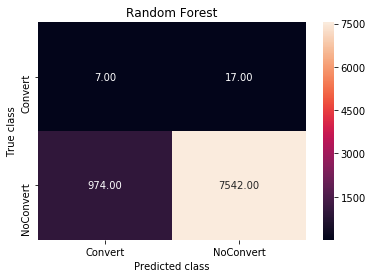

In [17]:
rf_y_pred = rf.predict(X_test_cv) 
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import sklearn.metrics as metrics
forest_cm = metrics.confusion_matrix(rf_y_pred,Y_test_cv, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = 
["Convert", "NoConvert"] , yticklabels = ["Convert", "NoConvert"] ) 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.title('Random Forest') 
plt.savefig('random_forest')

In [18]:
#logistic Regression
print(classification_report(Y_test_cv, logreg.predict(X_test_cv)))

             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      7559
        1.0       0.00      0.00      0.00       981

avg / total       0.78      0.89      0.83      8540



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


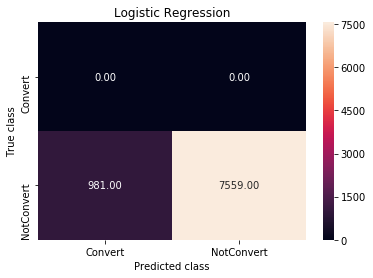

In [19]:
logreg_y_pred = logreg.predict(X_test_cv)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, Y_test_cv, [1,0]) 
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels =
["Convert", "NotConvert"] , yticklabels = ["Convert", "NotConvert"] ) 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.title('Logistic Regression') 
plt.savefig('logistic_regression')

In [28]:
#support Vector Machine
print(classification_report(Y_test_cv, svc.predict(X_test_cv)))

             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      7559
        1.0       0.00      0.00      0.00       981

avg / total       0.78      0.89      0.83      8540



/Users/clarawang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


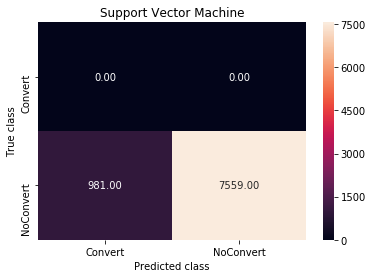

In [33]:
svc_y_pred = svc.predict(X_test_cv) 
svc_cm = metrics.confusion_matrix(svc_y_pred, Y_test_cv, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = 
["Convert", "NoConvert"] , yticklabels = ["Convert", "NoConvert"] ) 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.title('Support Vector Machine') 
plt.savefig('support_vector_machine')


In [36]:
#The ROC Curve

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, 
logreg.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, 
logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test)) 
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,
rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = 
%0.2f)' % logit_roc_auc) 
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = 
%0.2f)' % rf_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right")
plt.savefig('ROC') 
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-36-227204fdbbe1>, line 16)

In [ ]:

#feature imporance for random forest model
feature_labels = np.array(['Year','Month','zip','discount', 'quoted_amt', 'credit_score','CAT_zone', 
            'number_drivers','num_loaned_veh', 'num_owned_veh', 'num_leased_veh',
            'total_number_veh',  'season', 'avg_age_veh', 'avg_age_dv', 'high_education_ind',
           'num_luxury_motor', 'luxury_motor', 'AL', 'CT', 'FL', 'GA', 'MN', 'NJ', 'NY', 'WI', 'Carrier_1', 'Carrier_2','Carrier_3', 'Carrier_4', 'Carrier_5', 'Carrier_6', 'Carrier_7',
    'Carrier_8', 'Other',  'High', 'Low', 'Medium', 'other', 'own', 'rent'])
importance = rf.feature_importances_ 
feature_indexes_by_importance = importance.argsort() 
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], 
(importance[index] *100.0)))
plt.plot(feature_indexes_by_importance)

In [ ]:
x_train_cv

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline           

X = X[['Year','Month','zip','discount', 'quoted_amt', 'credit_score','CAT_zone', 
            'number_drivers','num_loaned_veh', 'num_owned_veh', 'num_leased_veh',
            'total_number_veh',  'season', 'avg_age_veh', 'avg_age_dv', 'high_education_ind',
           'num_luxury_motor', 'luxury_motor','convert_ind']].dropna()
y = X.pop('convert_ind')

model = RandomForestClassifier()
model.fit(X_train_cv, Y_train_cv)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh')) 
print(X.columns)

In [28]:
sum(Y_test_cv["convert_ind"])


981.0